In [1]:
import matplotlib.pyplot as plt
import numpy as np

import isic
from isic import printenc, println

SEED = 6

In [2]:
complete = isic.get_complete()
printenc("Check dataset integrity",
         len(complete.find_missing()) == 0)
metadata = complete.get_proc_metadata()

printenc("Columns overview",
         "Columns of interest: benign_malignant, image_type")

println(metadata.columns.values)


100%|████████████████████████████████████████████████| 81722/81722 [00:00<00:00, 178437.44it/s]


--------------------
Check dataset integrity
True
--------------------
--------------------
Columns overview
Columns of interest: benign_malignant, image_type
--------------------
['isic_id' 'attribution' 'copyright_license' 'acquisition_day'
 'age_approx' 'anatom_site_general' 'benign_malignant'
 'clin_size_long_diam_mm' 'concomitant_biopsy' 'dermoscopic_type'
 'diagnosis' 'diagnosis_confirm_type' 'family_hx_mm'
 'fitzpatrick_skin_type' 'image_type' 'lesion_id' 'mel_class'
 'mel_mitotic_index' 'mel_thick_mm' 'mel_type' 'mel_ulcer' 'melanocytic'
 'nevus_type' 'patient_id' 'personal_hx_mm' 'pixels_x' 'pixels_y' 'sex'
 'PROC_use' 'PROC_source']



--------------------
narrow from image_type first
KEEP DERMOSCOPIC ONLY
Population from sets other than dermoscopic very small
--------------------
image_type
dermoscopic           81155
clinical: overview      432
clinical: close-up       98
TBP tile: overview       36
Name: count, dtype: int64

--------------------
Preview four images from each set
--------------------
TBP tile: overview
           isic_id benign_malignant          image_type
3135  ISIC_9731626              NaN  TBP tile: overview
3124  ISIC_4444941              NaN  TBP tile: overview
3141  ISIC_5546310              NaN  TBP tile: overview
3117  ISIC_8572047              NaN  TBP tile: overview



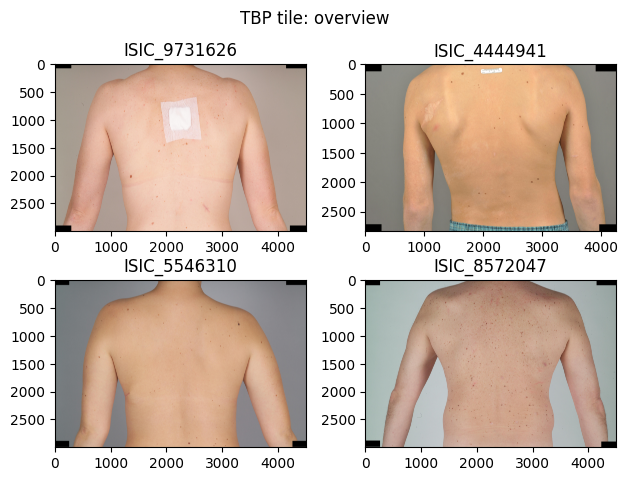

clinical: close-up
            isic_id benign_malignant          image_type
62291  ISIC_0024221        malignant  clinical: close-up
65     ISIC_7288606           benign  clinical: close-up
62298  ISIC_0024214        malignant  clinical: close-up
48     ISIC_6587301           benign  clinical: close-up



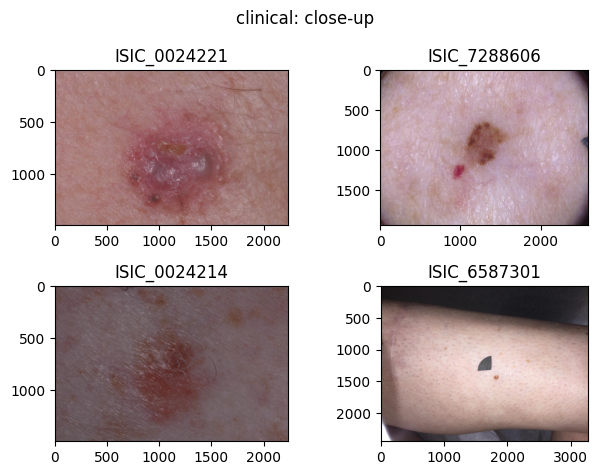

clinical: overview
           isic_id benign_malignant          image_type
1172  ISIC_9417610        malignant  clinical: overview
1339  ISIC_3560753        malignant  clinical: overview
1555  ISIC_3231047        malignant  clinical: overview
976   ISIC_1816574           benign  clinical: overview



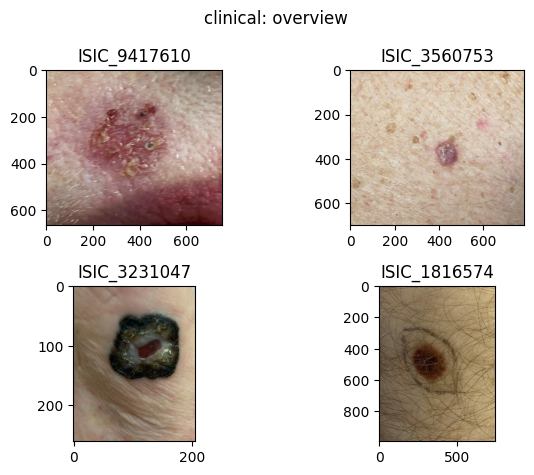

dermoscopic
            isic_id benign_malignant   image_type
54764  ISIC_0031748           benign  dermoscopic
53057  ISIC_0033455           benign  dermoscopic
22177  ISIC_0495405           benign  dermoscopic
50345  ISIC_0036216           benign  dermoscopic



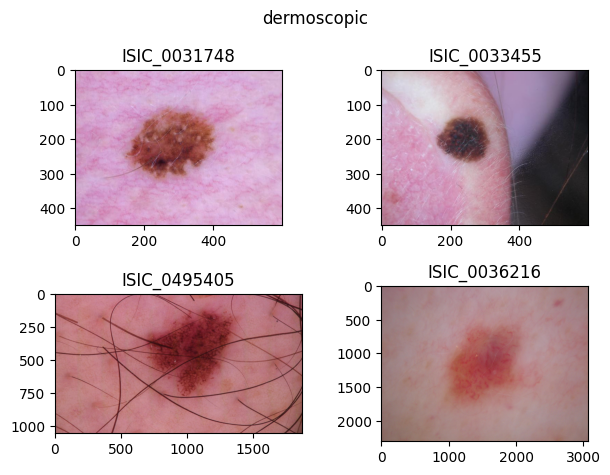

--------------------
Final result
--------------------
image_type
dermoscopic    81155
Name: count, dtype: int64



In [3]:
# for figuring out "mixed types"
# print(metadata.iloc[:, 19])
# print(metadata.iloc[:, 19].value_counts(dropna = False))

printenc(
"""\
narrow from image_type first
KEEP DERMOSCOPIC ONLY
Population from sets other than dermoscopic very small\
""")

println(metadata['image_type'].value_counts())

printenc('Preview four images from each set') 

isic.preview_classes(complete, metadata, 'image_type')

metadata = metadata[metadata['image_type'] == 'dermoscopic']
printenc("Final result")
println(metadata['image_type'].value_counts())

In [4]:
printenc(
"""\
Study benign/malignant (b/m)

Observe that number of indeterminate cases very small.
Further the indeterminate samples can have diagnosis belonging to overwhemingly malignant/benign results.
The fact that they are still a distinct set warrants more caution.

On the other hand many more na some of which might be inferred.
some of these can come from HAM10000 where before I'd had to do labelling from diagnosis.\
""")
println(metadata['benign_malignant'].value_counts(dropna = False))

bm_groups = metadata.groupby('benign_malignant', dropna = False)

indet_diags = set()
nan_diags = []

for name, group in bm_groups:
    printenc(f"Diagnosis result for [{str(name)}] b/m")
    println(group['diagnosis'].value_counts(dropna = False))
    if name not in ['benign', 'malignant']:
        diags = set(group['diagnosis'].unique())
        if type(name) is not str and np.isnan(name):
            nan_diags = diags
        else:
            indet_diags = indet_diags | diags

printenc('Diagnoses with indeterminate result',
         str(indet_diags),
         'Diagnoses with nan result',
         str(nan_diags))


--------------------
Study benign/malignant (b/m)

Observe that number of indeterminate cases very small.
Further the indeterminate samples can have diagnosis belonging to overwhemingly malignant/benign results.
The fact that they are still a distinct set warrants more caution.

On the other hand many more na some of which might be inferred.
some of these can come from HAM10000 where before I'd had to do labelling from diagnosis.
--------------------
benign_malignant
benign                     63867
malignant                   8906
NaN                         8086
indeterminate                150
indeterminate/malignant       80
indeterminate/benign          66
Name: count, dtype: int64

--------------------
Diagnosis result for [benign] b/m
--------------------
diagnosis
nevus                                 32581
NaN                                   27742
seborrheic keratosis                    963
actinic keratosis                       461
solar lentigo                           3

In [5]:
printenc("Study diagnosis")

diag_groups = metadata.groupby('diagnosis', dropna = False)

for name, group in diag_groups:
    printenc(f"Benign/malignant statistics for diagnosis [{name}]")
    println(group['benign_malignant'].value_counts(dropna = False))

--------------------
Study diagnosis
--------------------
--------------------
Benign/malignant statistics for diagnosis [AIMP]
--------------------
benign_malignant
indeterminate              61
indeterminate/malignant    44
indeterminate/benign       14
benign                      2
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [acrochordon]
--------------------
benign_malignant
benign    301
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [actinic keratosis]
--------------------
benign_malignant
NaN              886
benign           461
indeterminate      3
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [angiofibroma or fibrous papule]
--------------------
benign_malignant
benign    4
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [angiokeratoma]
--------------------
benign_malignant
benign    13
Name: count, dtyp

In [6]:
printenc(
"""\
Look at diagnoses involved in INDETERMINATE b/m only,
this helps confirm whether benign/malignant can be inferred.

b/m type distribution of these diagnoses fall in two categories,
1. Most are indeterminate. Some possibly mal, some possibly benign,
2. Most belong either to benign or malignant, yet these are still LABELED as indeterminate.

IN NEITHER CASE DOES IT APPEAR SENSIBLE TO JUST ASSIGN THEM A DEFINITE LABEL.
and the sample size is so small that giving them a special 0.5 isn't really worth it.\
""")

diag_groups = metadata.groupby('diagnosis', dropna = False)

for name, group in diag_groups:
    if (name not in indet_diags):
        continue
    printenc(f"Benign/malignant statistics for diagnosis [{name}]")
    # this will drop nan, 
   
    println(group['benign_malignant'].value_counts(dropna = False))

--------------------
Look at diagnoses involved in INDETERMINATE b/m only,
this helps confirm whether benign/malignant can be inferred.

b/m type distribution of these diagnoses fall in two categories,
1. Most are indeterminate. Some possibly mal, some possibly benign,
2. Most belong either to benign or malignant, yet these are still LABELED as indeterminate.

IN NEITHER CASE DOES IT APPEAR SENSIBLE TO JUST ASSIGN THEM A DEFINITE LABEL.
and the sample size is so small that giving them a special 0.5 isn't really worth it.
--------------------
--------------------
Benign/malignant statistics for diagnosis [AIMP]
--------------------
benign_malignant
indeterminate              61
indeterminate/malignant    44
indeterminate/benign       14
benign                      2
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [actinic keratosis]
--------------------
benign_malignant
NaN              886
benign           461
indeterminate      3
Name: count, 

In [7]:
printenc(
"""\
Look at diagnoses involved in NAN b/m only,
this helps confirm whether benign/malignant can be inferred.

Now there are many more that appear to just belong to one group
but are simply not labelled for some reason (the case with HAM10000)
further one can find references where these are categorised as malignant/benign.
GPT also assigns benign / malignant to these diagnoses which tally with the statistics.

It therefore seems REASONABLE TO INFER BENIGN/MALIGNANT VALUES.

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9395205/
- WHO classification of skin tumours (actually haven't checked yet!) - available on LibGen\
""")

diag_groups = metadata.groupby('diagnosis', dropna = False)

for name, group in diag_groups:
    if (name not in nan_diags):
        continue
    printenc(f"Benign/malignant statistics for diagnosis [{name}]")
    # this will drop nan, 
   
    println(group['benign_malignant'].value_counts(dropna = False))

--------------------
Look at diagnoses involved in NAN b/m only,
this helps confirm whether benign/malignant can be inferred.

Now there are many more that appear to just belong to one group
but are simply not labelled for some reason (the case with HAM10000)
further one can find references where these are categorised as malignant/benign.
GPT also assigns benign / malignant to these diagnoses which tally with the statistics.

It therefore seems REASONABLE TO INFER BENIGN/MALIGNANT VALUES.

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9395205/
- WHO classification of skin tumours (actually haven't checked yet!) - available on LibGen
--------------------
--------------------
Benign/malignant statistics for diagnosis [actinic keratosis]
--------------------
benign_malignant
NaN              886
benign           461
indeterminate      3
Name: count, dtype: int64

--------------------
Benign/malignant statistics for diagnosis [atypical spitz tumor]
--------------------
benign_malignant
in